## **Importing Libraries**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


## **Reading Data**

In [45]:
data = pd.read_csv("diabetes.csv")
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


## **Data Information**

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Statistical Information of Data**

In [47]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Heatmap (Data Visualization)**

<Axes: title={'center': 'Heatmap for Correlation'}>

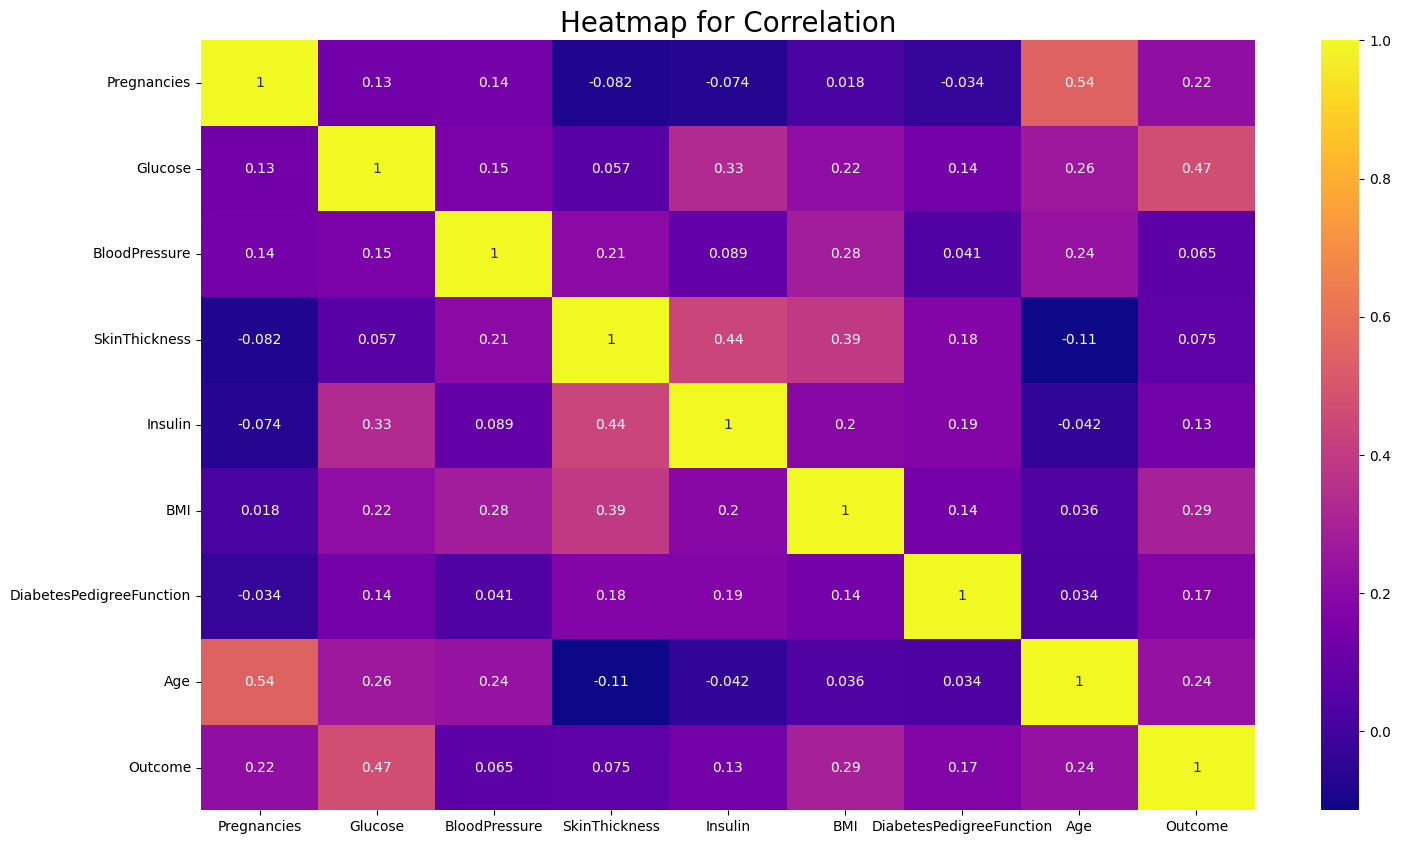

In [48]:
plt.figure(figsize=(17,10))
plt.title("Heatmap for Correlation", fontsize=20)
sns.heatmap(data.corr(),annot = True, cmap='plasma')

## **Scaling the data without independent column**

In [49]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(data.drop('Outcome',axis=1)).transform(data.drop('Outcome',axis=1))
scaled_data = pd.DataFrame(scaled, columns = data.columns[:-1])
scaled_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## **Splitting the data**

In [50]:
# Splitting the columns in to independent variables (X) and dependent variable (Y)
X = scaled_data
Y = data['Outcome']

In [51]:
# Split data in to train and test 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

## **Applying SVM with Linear Kernel (as the two classes are linearly separable)**

In [52]:
# Apply SVM Model
svc = SVC(kernel='linear') 
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.8021


## **Model is 80.21% accurate!!**

In [53]:
# Confusion Matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

In [54]:
print(confusion_mtx )

[[117  13]
 [ 25  37]]


**True positive: 117** (We predicted a positive result and it was positive)                                                                                                                                        
**True negative: 37** (We predicted a negative result and it was negative)                                                                                    
**False positive: 13** (We predicted a positive result and it was negative)                                                                     
**False negative: 25** (We predicted a negative result and it was positive                                                 

In [55]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.74      0.60      0.66        62

    accuracy                           0.80       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.80      0.80      0.80       192

